<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Walk-forward Optimization

## Install strategy file

Moonshot looks for strategies inside the "moonshot" directory, so execute the following cell to "install" the strategy by moving the file to that location: 

> The `!` sytax below lets us execute terminal commands from inside the notebook. 

In [1]:
# make directory if doesn't exist
!mkdir -p /codeload/moonshot

!mv kitchensink_ml.py /codeload/moonshot/

## Run walk-forward optimization

Now we can run a walk-forward optimization, which iteratively trains and tests the machine learning model over successive periods.

In this example, we retrain the model annually (`train="Y"`).   

Because we do not specify a `model` parameter, the default model will be used, which is a regression model using Stochastic Gradient Descent. See the usage guide for more details about the default model.

The parameter `progress=True` causes the moonshot service to log the walk-forward progress during the analysis. To view the progress, open a separate Terminal window and stream the logs (using `cut` to format the logs to fit better in the window): `quantrocket flightlog stream | cut -d ' ' -f 5-`

> As always, it is also a good idea to stream the detailed logs (`quantrocket flightlog stream -d`) to see more granular logging during the walk-forward optimization.

In [2]:
from quantrocket.moonshot import ml_walkforward
ml_walkforward("kitchensink-ml",
                start_date="2006-12-31",
                end_date="2018-12-31",
                train="Y",
                progress=True,
                filepath_or_buffer="kitchensink_ml*")

In the terminal window, you'll see output resembling the following:

```
[kitchensink-ml] Walk-forward analysis progress
                train                    test             progress
                start         end       start         end   status Sharpe
iteration
0          1998-12-31  2001-12-30  2001-12-31  2002-12-30        ✓  -0.66
1          2001-12-31  2002-12-30  2002-12-31  2003-12-30        ✓   4.13
2          2002-12-31  2003-12-30  2003-12-31  2004-12-30        ✓   0.59
3          2003-12-31  2004-12-30  2004-12-31  2005-12-30        -
4          2004-12-31  2005-12-30  2005-12-31  2006-12-30
5          2005-12-31  2006-12-30  2006-12-31  2007-12-30
6          2006-12-31  2007-12-30  2007-12-31  2008-12-30
...
```

## Walk-forward results

The walk-forward optimization returns a backtests results CSV and the trained model.

### Backtest results CSV
Open the backtest results CSV like you would for any Moonshot backtest, using Moonchart (and/or pyfolio). 

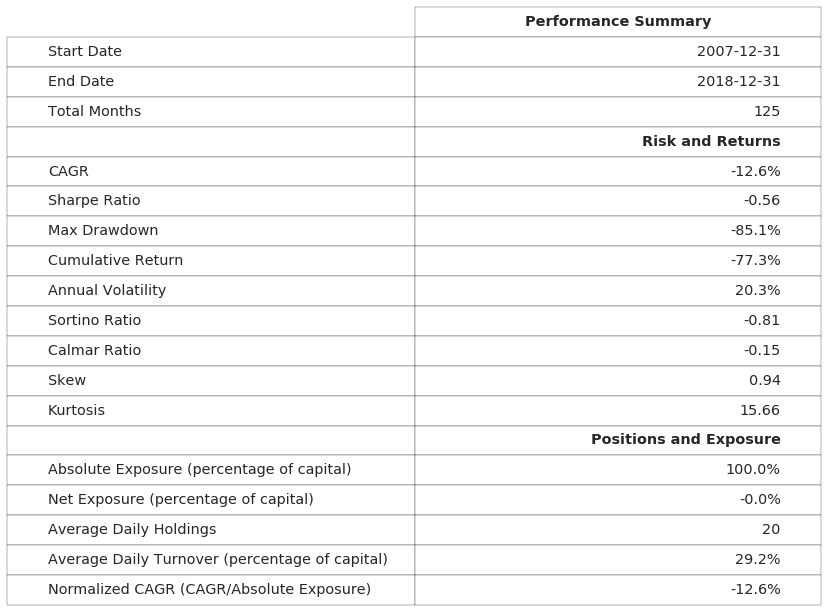

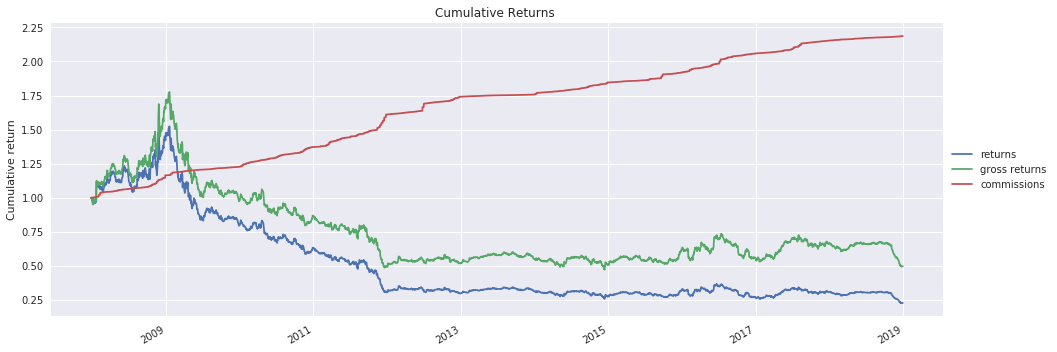

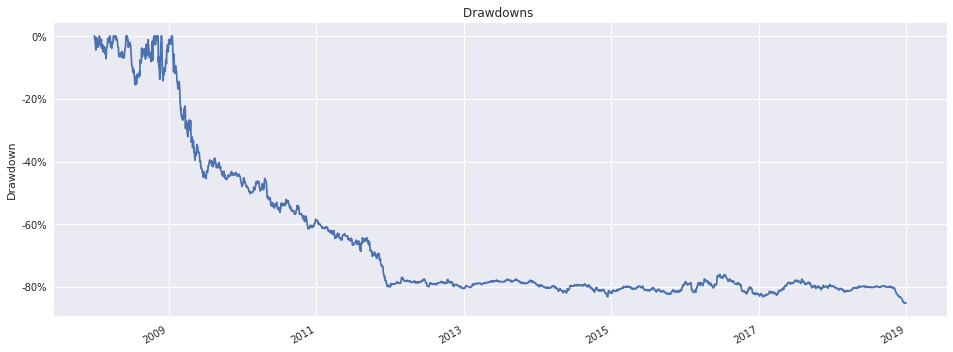

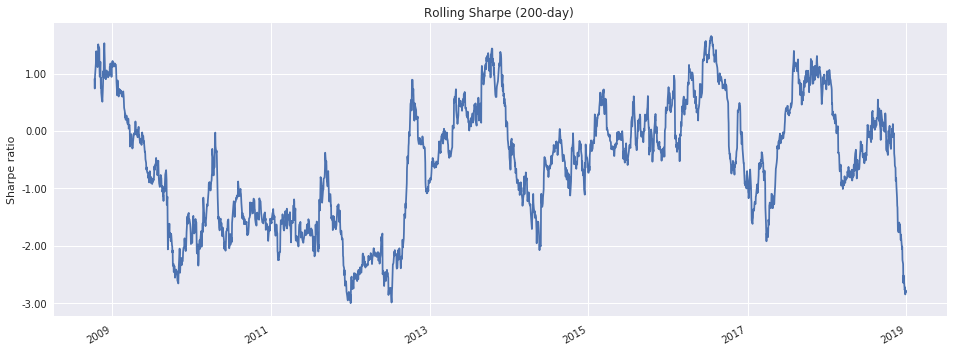

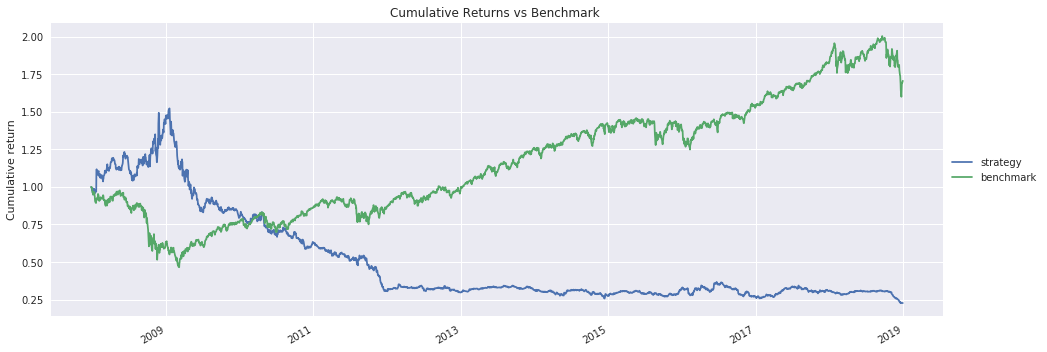

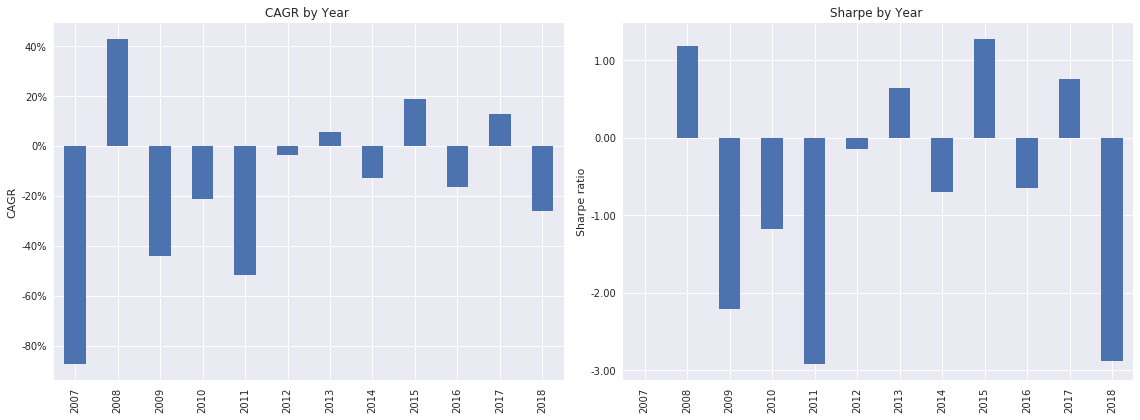

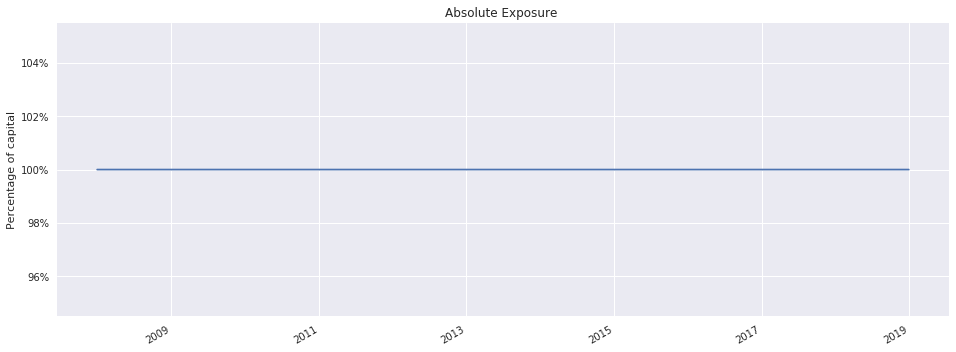

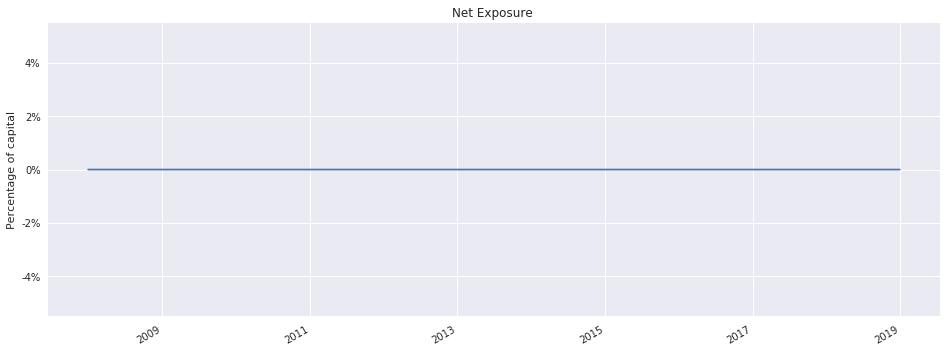

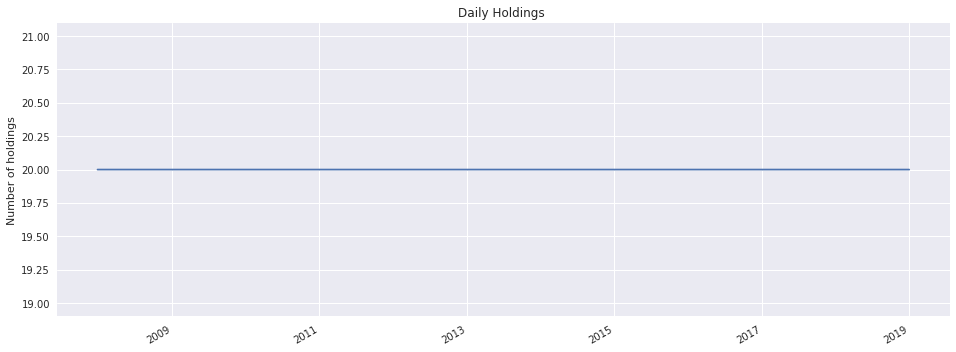

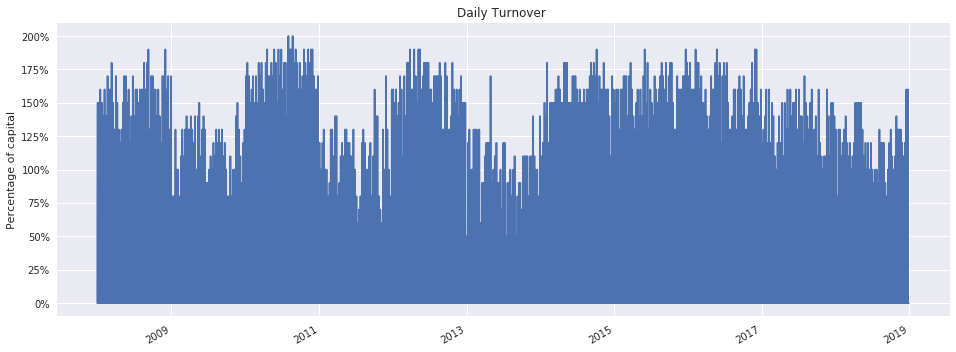

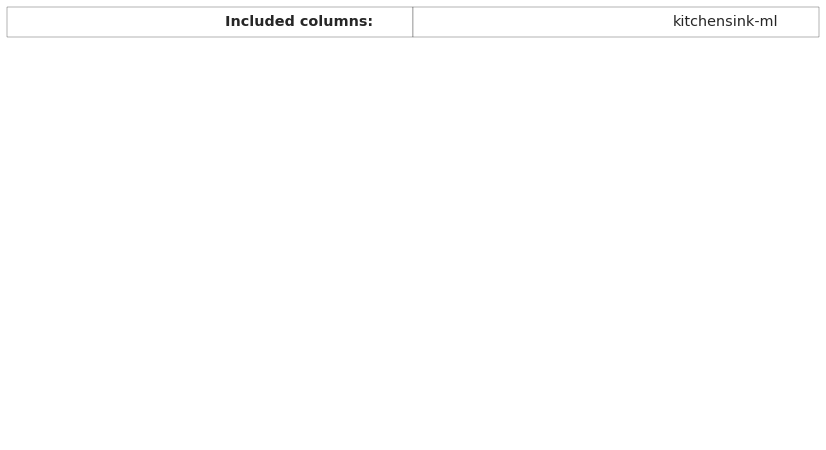

In [3]:
from moonchart import Tearsheet
Tearsheet.from_moonshot_csv("kitchensink_ml_results.csv")

### Trained model

The trained model can be opened and inspected with `joblib`:

In [4]:
import joblib
trained_model = joblib.load("kitchensink_ml_trained_model.joblib")
print(type(trained_model))

<class 'sklearn.pipeline.Pipeline'>


In [5]:
estimator = trained_model.named_steps["estimator"]
print(estimator.coef_)

[-1.34829382e-03  1.59586293e-03 -5.37964974e-03  5.03634172e-03
  1.76697327e-03 -4.81749326e-03  2.44881956e-03 -7.94251770e-03
  4.54632030e-03  5.46585468e-03  1.19083565e-04 -1.70422498e-03
 -1.37027375e-03  2.07582380e-03  1.44390384e-03  2.84971697e-03
 -1.32943936e-05  3.70398584e-03  2.02261033e-03 -3.10249955e-03
 -2.06972496e-03 -2.42205016e-03 -2.34435212e-03 -1.59885311e-03
 -8.23607051e-04 -1.96146042e-03 -1.28053039e-03 -2.88410845e-03
  9.27585927e-03  4.77671640e-03 -5.71552531e-03 -6.60115692e-03
 -7.21790026e-03 -9.96407539e-03 -5.59588899e-04  6.60188312e-04
  1.26066909e-03  1.18903662e-03  2.72005450e-03 -4.17630673e-03
 -4.67664325e-03 -1.47470286e-03  1.19983041e-03 -1.56517068e-03
 -3.28986787e-03  5.52887615e-05  2.00923245e-03  3.52792327e-04
 -1.84249187e-03 -3.81018427e-03  1.21338737e-03 -1.02182224e-03
  3.69924661e-03 -2.52483855e-03  9.86406649e-03 -5.58886283e-04
 -1.68792396e-03  1.66169044e-04  1.34882574e-03 -5.24351352e-04
 -4.97099554e-03 -1.04982

To perform live trading, you would need to update your ML strategy to point to this trained model:

```python
    class TheKitchenSinkML(MoonshotML):
        ...
        MODEL = "/codeload/kitchensink_ml/kitchensink_ml_trained_model.joblib"
```

See the usage guide for more details.

***

## *Next Up*

Part 5: [Dimensionality Reduction with PCA](Part5-Dimensionality-Reduction.ipynb)